In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pre = 'https://www.basketball-reference.com/leagues/NBA_'
suf = '_totals.html'

urls = []
years = 2000

while years < 2018:
    urls.append(pre+str(years)+suf)
    years+=1

In [3]:
stats = pd.DataFrame()
for i in urls:
    html = requests.get(i).content
    df_list = pd.read_html(html)
    df = df_list[-1]
    df['Year'] = i[49:53:1]
    stats = stats.append(df)
    stats = stats[stats['Rk']!='Rk']
    movement = stats[stats['Tm']=='TOT']
    stats = stats[stats['Tm']!='TOT']

In [4]:
stats.rename(columns={'3P':'Three_P', '3PA':'Three_PA', '3P%':'Three_P%', \
                     '2P':'Two_P', '2PA':'Two_PA', '2P%':'Two_P%'}, inplace=True)

In [5]:
cols_floats = stats.columns[7:]
for i in cols_floats:
    stats[i] = stats[i].astype(float)
    
cols_whole = stats[['Rk', 'G', 'GS', 'Age', 'Year', 'PTS']]
for x in cols_whole:
    stats[x] = stats[x].astype(int)
    
cols_cat = stats[['Pos']]
for y in cols_cat:
    stats[y] = stats[y].astype('category')

____

In [6]:
plt.rcParams['figure.figsize'] = 20,10
sns.set(style='white')

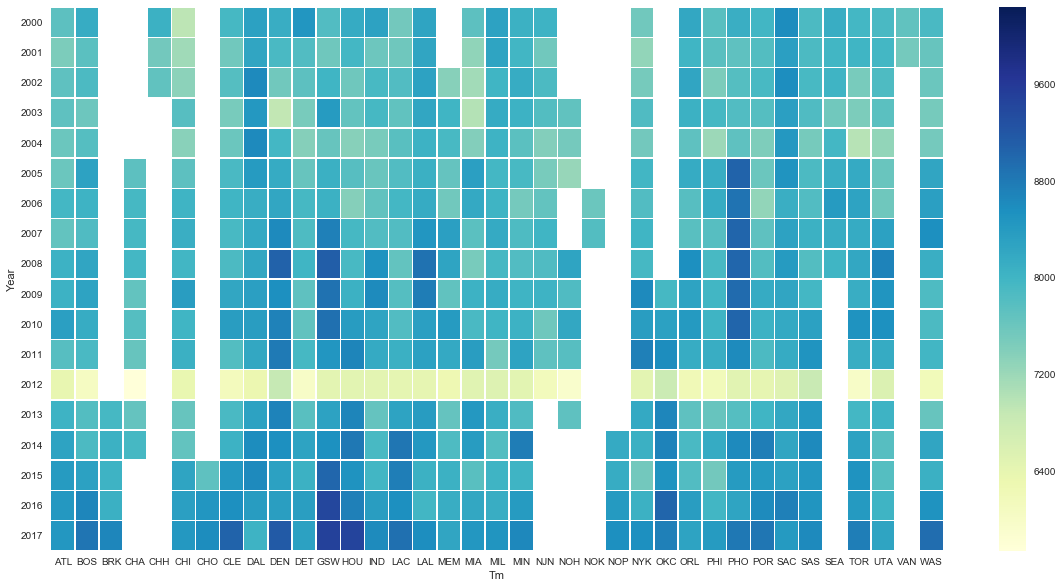

In [53]:
plt.rcParams['figure.figsize'] = 20,10
team_pts = stats.groupby(['Tm', 'Year']).sum()
team_pts = team_pts.reset_index()


test = team_pts.pivot('Year', 'Tm', 'PTS')
heat = sns.heatmap(data=test, linewidths=.5, cmap="YlGnBu", center=team_pts['PTS'].mean())
plt.setp(heat.get_yticklabels(), rotation=360)
plt.show()

Insert the code of the team you would like to visualize: CHI


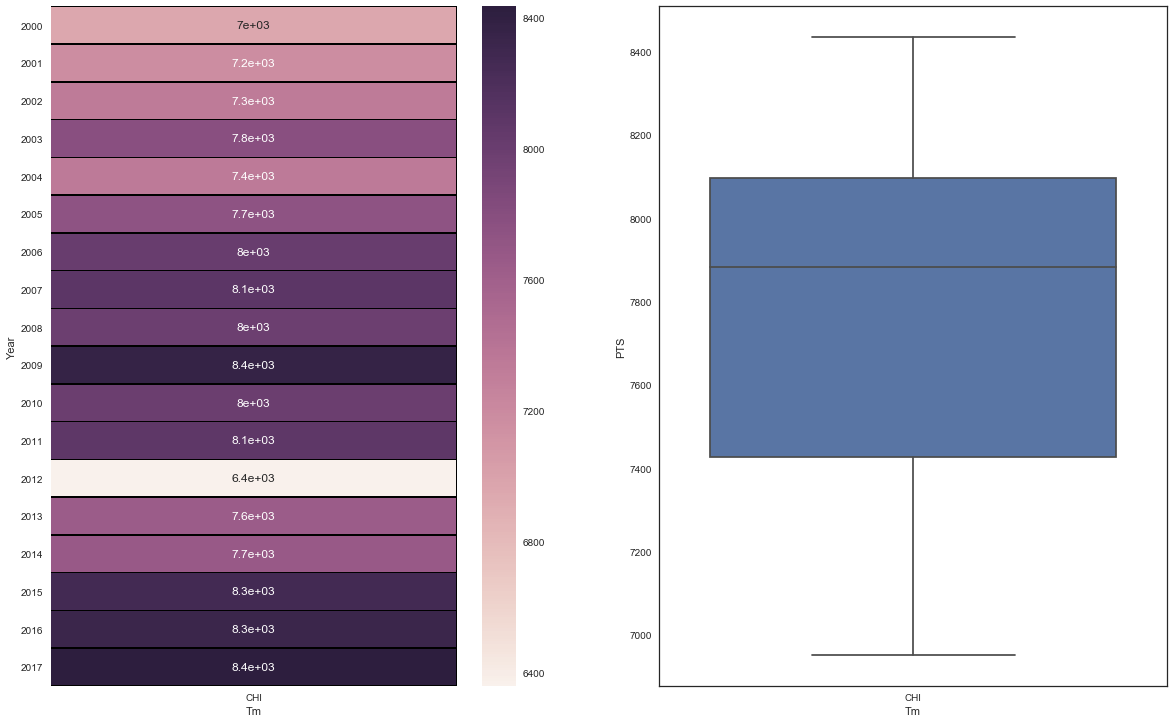

In [36]:
#create function for heatmap viz
def heatmap(Team):
    team_pts = stats.groupby(['Tm', 'Year']).sum()
    team_pts = team_pts.reset_index()
    team_pts = team_pts[team_pts['Tm']==Team]
    test = team_pts.pivot('Year', 'Tm', 'PTS')
    a = sns.heatmap(data=test, linewidths=0.5, linecolor='black', ax=ax[0], annot=True)
    plt.setp(a.get_yticklabels(), rotation=360)
    plt.show()

#create function for boxplot viz
def box(Team):
    b = sns.boxplot(data=team_pts[team_pts['Tm']==Team] , x='Tm', y='PTS', showfliers=False, ax=ax[1])
    
#create function to run both of the above functions
def plots(Team):
    box(Team)
    heatmap(Team)
    
#side-by-side plot and pick your favorite team   
f, ax = plt.subplots(1,2, figsize=(20,12.5))
Team = raw_input('Insert the code of the team you would like to visualize: ')
plots(Team)

Insert the code of the team you would like to see: CHI
Insert the year you would like to look at: 2009


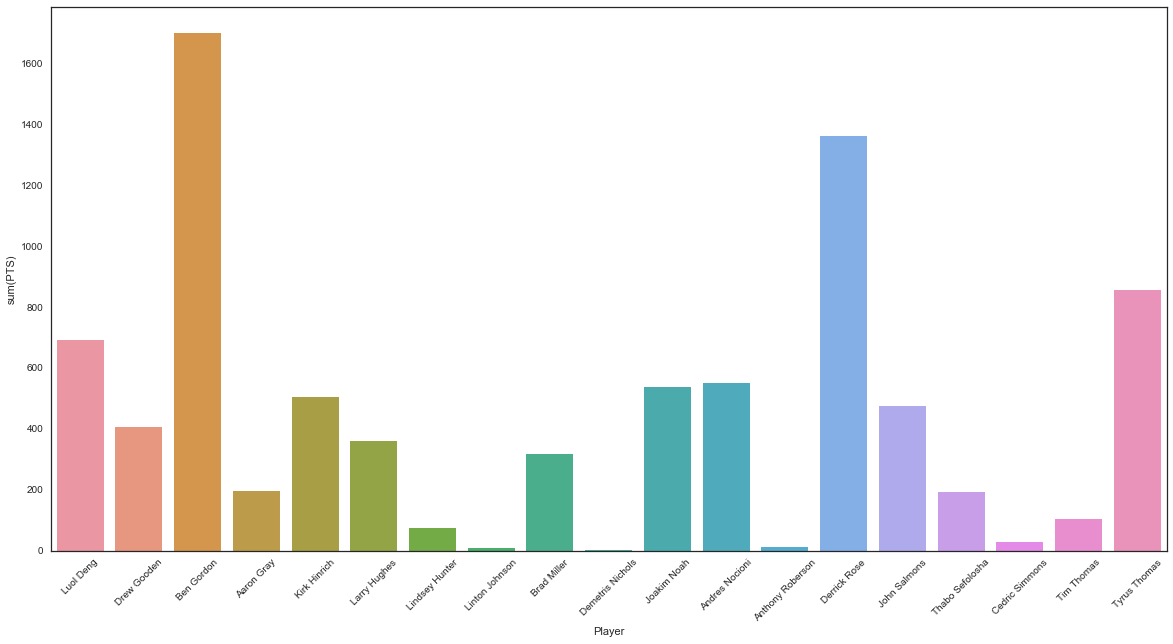

In [37]:
Team = raw_input('Insert the code of the team you would like to see: ')
Year = raw_input('Insert the year you would like to look at: ')

c = sns.barplot(data=stats.loc[(stats['Tm']==Team) & (stats['Year']==int(Year))], x='Player', y='PTS',\
                ci=False, estimator=sum, )
c.set_xticklabels(c.get_xticklabels(), rotation = 45)
plt.show()

Ben Gordon


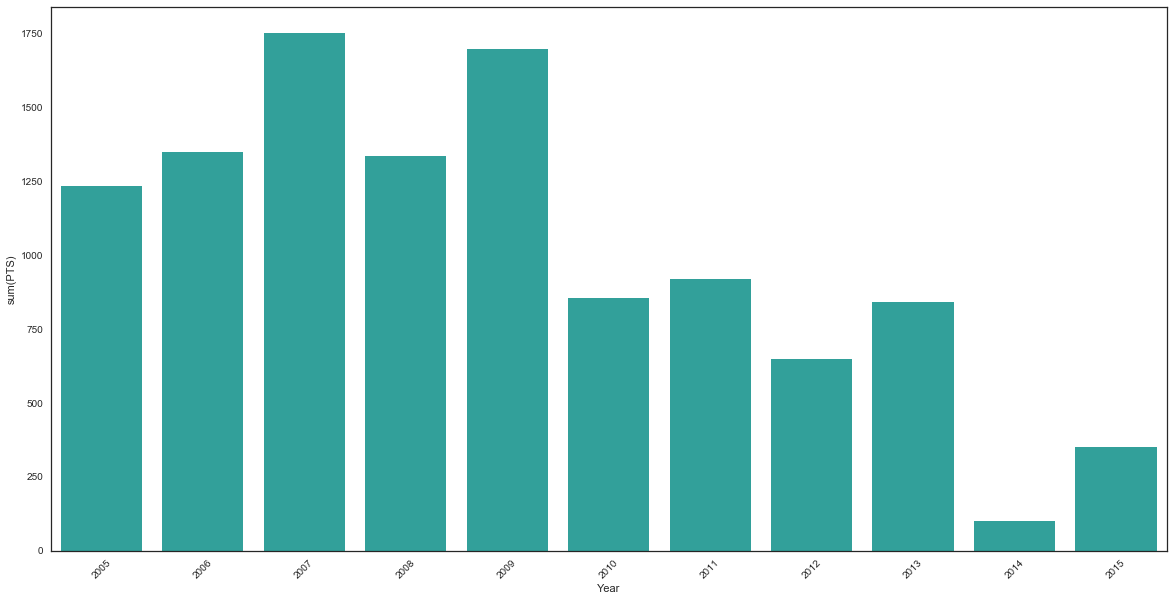

In [38]:
Player = raw_input()

d = sns.barplot(data=stats[stats['Player']==Player], x='Year', y='PTS', ci=False, estimator=sum, color='lightseagreen')
d.set_xticklabels(d.get_xticklabels(), rotation = 45)
plt.show()